In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('creditcard.csv')

Data Visualization 

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Pre-processing data

In [4]:
from sklearn.preprocessing import StandardScaler
dataset['normalizedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'],axis=1)
dataset = dataset.drop(['Time'],axis=1)

In [5]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
x = dataset.iloc[:, dataset.columns != 'Class']
y = dataset.iloc[:, dataset.columns == 'Class']

In [7]:
#creating train-test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
X_train.shape

(199364, 29)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [11]:
#making the neural network

In [12]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  1.13.1


In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential([
    Dense(units = 16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(rate=0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Model is created. Now train it!

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=15, epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
199364/199364 [==============================] - 15s 78us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/3
199364/199364 [==============================] - 16s 80us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/3
199364/199364 [==============================] - 15s 75us/step - loss: 0.0036 - acc: 0.9994


In [18]:
score = model.evaluate(X_test,Y_test)

85443/85443 [==============================] - 1s 10us/step


In [19]:
#evaluating the result using Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [21]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(Y_test)

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred.round())

In [23]:
print(conf_matrix)

[[85278    18]
 [   35   112]]


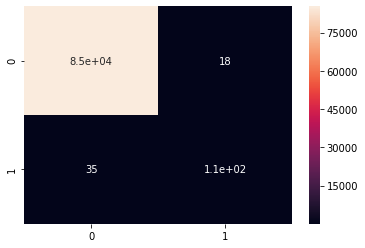

In [24]:
import seaborn
seaborn.heatmap(conf_matrix, annot= True)

In [25]:
#Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=100)

In [28]:
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
Y_pred = rf.predict(X_test)

In [30]:
rf.score(X_test,Y_test)

0.9994967405170698

In [31]:
cmatrix = confusion_matrix(Y_test,Y_pred)

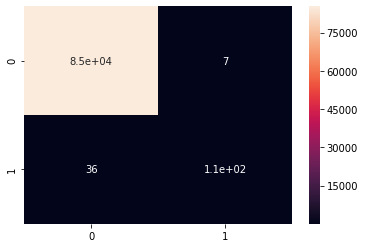

In [32]:
seaborn.heatmap(cmatrix, annot=True)

In [33]:
Y_pred = rf.predict(x)

In [34]:
confusion_matrix = confusion_matrix(y,Y_pred)

In [35]:
confusion_matrix

array([[284308,      7],
       [    36,    456]])

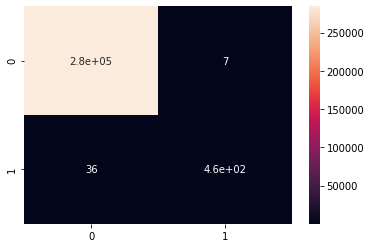

In [36]:
seaborn.heatmap(confusion_matrix,annot=True)

In [ ]:
#the error rate of the model is 0.01%, an acceptable error rate. 
#However, there seems to be more type 2 error than type 1 error.
#A future project could be to reduce the number of type 2 error.
#However, since the error rate is so small this model could be used by banks for fraud detection.